Analysis
Observed Trend 1:The temperature will be higher when near the equator.
Observed Trend 2: There are more cities in the northern hemisphere(positive latitudes).
Observed Trend 3: The patternes of humidity, couldiness, and wind speeds are not depend on latitudes. 

In [1]:
import random
from citipy import citipy
from api_key import apikey
import numpy as np
import pandas as pd
import csv
import seaborn
import matplotlib.pyplot as plt
import requests as req
import json



In [2]:
#set URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
appid=apikey
settings = {"units": "imperial", "appid":apikey}

In [32]:
#Generate cities list
data=pd.DataFrame(columns=['Latitudes','Longitudes','City'])
lat=[]
lng=[]
for x in range(0,1200):
    lat.append(random.uniform(-90,90))
    lng.append(random.uniform(-180,180))
data['Latitudes']=lat
data['Longitudes']=lng
cities = []
for index, row in data.iterrows():
    city=citipy.nearest_city(row["Latitudes"],row["Longitudes"])
    cities.append(city.city_name)
data['City']=cities
data.head()

,Latitudes,Longitudes,City
0,-66.590087,83.502314,busselton
1,-60.872105,-132.391727,rikitea
2,0.202822,117.379940,bontang
3,81.979385,-130.598163,tuktoyaktuk
4,-20.013031,-105.369667,puerto ayora


In [33]:
new_data = data.drop_duplicates("City",keep="first")
len(new_data)

509

In [34]:
count = 0
temp=[]
humidity =[]
clouds = []
wind = []

#iterate through the rows to pull data from the api 
for index,row in new_data.iterrows():
    count+= 1
    target_url = url+"lat="+str(row["Latitudes"])+"&lon="+str(row["Longitudes"])+"&appid="+apikey+"&units="+units
    try:
        info = req.get(target_url).json()
        temp.append(info['main']['temp'])
        humidity.append(info['main']['humidity'])
        clouds.append(info['clouds']['all'])
        wind.append(info['wind']['speed'])
        time.sleep(1)
    except:
        #print(f"No data for this city: {row['city']}")
        print(f"Processing Record {count} | {row['City']}")
        print(target_url)

print("-"*100)
print("                Data Retrieval Complete")
print("-"*100)


#assign the values from the arrays to the data frame
new_data["Temperature(F)"]=temp
new_data["Humidity(%)"]=humidity
new_data["Cloudiness(%)"]=clouds
new_data["Windspeed(mph)"]=wind


Processing Record 1 | busselton
http://api.openweathermap.org/data/2.5/weather?lat=-66.59008739162086&lon=83.50231404280686&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 2 | rikitea
http://api.openweathermap.org/data/2.5/weather?lat=-60.872104732080075&lon=-132.39172729607859&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 3 | bontang
http://api.openweathermap.org/data/2.5/weather?lat=0.20282163815019771&lon=117.37993977777393&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 4 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?lat=81.97938547221219&lon=-130.5981633868413&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 5 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?lat=-20.01303124997203&lon=-105.36966677351924&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 6 | yellowknife
http://api.openweathermap.org/data/2.5/weather?lat=67.29579726903478

Processing Record 48 | wahpeton
http://api.openweathermap.org/data/2.5/weather?lat=45.835293202428005&lon=-96.83577505335863&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 49 | dothan
http://api.openweathermap.org/data/2.5/weather?lat=30.940601751327378&lon=-85.6870436228465&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 50 | roald
http://api.openweathermap.org/data/2.5/weather?lat=73.56481093215737&lon=1.2707978034936787&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 51 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?lat=84.32756562475532&lon=-177.63635361601897&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 52 | evensk
http://api.openweathermap.org/data/2.5/weather?lat=61.01723330367798&lon=160.77915730586324&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 53 | asyut
http://api.openweathermap.org/data/2.5/weather?lat=25.526284154115658&lon=27.545858

Processing Record 94 | bollnas
http://api.openweathermap.org/data/2.5/weather?lat=62.08352055081775&lon=15.4766333119139&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 95 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?lat=67.88020843102692&lon=-43.535230364119826&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 96 | nishihara
http://api.openweathermap.org/data/2.5/weather?lat=20.950193894975797&lon=131.48464670406366&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 97 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?lat=-25.28519847134693&lon=69.32123563048378&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 98 | souillac
http://api.openweathermap.org/data/2.5/weather?lat=-31.30803625456648&lon=61.849980183115576&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 99 | alofi
http://api.openweathermap.org/data/2.5/weather?lat=-25.571244111582303&lo

Processing Record 140 | itamaraju
http://api.openweathermap.org/data/2.5/weather?lat=-17.502618970465136&lon=-39.758338769340696&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 141 | jinchengjiang
http://api.openweathermap.org/data/2.5/weather?lat=25.221419251595506&lon=108.4289614438465&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 142 | sorvag
http://api.openweathermap.org/data/2.5/weather?lat=61.978801450204685&lon=-11.361805663556225&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 143 | chapais
http://api.openweathermap.org/data/2.5/weather?lat=51.82098680534662&lon=-75.63678943349451&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 144 | sile
http://api.openweathermap.org/data/2.5/weather?lat=41.45673069135157&lon=29.36150981814285&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 145 | manta
http://api.openweathermap.org/data/2.5/weather?lat=-0.7457455031388207&l

Processing Record 186 | obo
http://api.openweathermap.org/data/2.5/weather?lat=4.12405090567502&lon=26.478487143609925&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 187 | hamilton
http://api.openweathermap.org/data/2.5/weather?lat=33.58679772533435&lon=-66.20997956437675&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 188 | saint anthony
http://api.openweathermap.org/data/2.5/weather?lat=54.80283902468017&lon=-51.32653203118218&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 189 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?lat=-17.96355360497327&lon=66.74240432977325&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 190 | vigeland
http://api.openweathermap.org/data/2.5/weather?lat=58.74026987585006&lon=7.475254202524269&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 191 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?lat=51

Processing Record 232 | linxia
http://api.openweathermap.org/data/2.5/weather?lat=36.303969557265816&lon=102.78578139091246&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 233 | lodja
http://api.openweathermap.org/data/2.5/weather?lat=-4.116993419857806&lon=24.4248856983815&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 234 | kamenka
http://api.openweathermap.org/data/2.5/weather?lat=69.01204927150954&lon=43.88667983763571&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 235 | faanui
http://api.openweathermap.org/data/2.5/weather?lat=-0.275916328749517&lon=-152.2642846662303&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 236 | kerteh
http://api.openweathermap.org/data/2.5/weather?lat=4.784083463129349&lon=106.32739500114747&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 237 | lagoa
http://api.openweathermap.org/data/2.5/weather?lat=49.7400123386893&lon=-35.735010660

Processing Record 278 | vaitape
http://api.openweathermap.org/data/2.5/weather?lat=-18.17644560095077&lon=-155.29588515263825&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 279 | trincomalee
http://api.openweathermap.org/data/2.5/weather?lat=9.886807610642705&lon=83.88867417114034&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 280 | vaitupu
http://api.openweathermap.org/data/2.5/weather?lat=-11.307746519997053&lon=-179.80326022262588&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 281 | alice springs
http://api.openweathermap.org/data/2.5/weather?lat=-21.15959147103186&lon=135.33851318935035&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 282 | araouane
http://api.openweathermap.org/data/2.5/weather?lat=19.698110211745202&lon=-4.720502824308028&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 283 | naples
http://api.openweathermap.org/data/2.5/weather?lat=40.77290510

Processing Record 324 | barao de melgaco
http://api.openweathermap.org/data/2.5/weather?lat=-16.6410558336905&lon=-55.358895046986234&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 325 | llanes
http://api.openweathermap.org/data/2.5/weather?lat=45.376609331981825&lon=-4.916866700709363&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 326 | hay river
http://api.openweathermap.org/data/2.5/weather?lat=58.503624128375975&lon=-113.91834622106047&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 327 | labuhan
http://api.openweathermap.org/data/2.5/weather?lat=-10.627464511631615&lon=101.92599046295373&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 328 | elko
http://api.openweathermap.org/data/2.5/weather?lat=41.0035055784617&lon=-115.71006781172153&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 329 | omsukchan
http://api.openweathermap.org/data/2.5/weather?lat=64.893032146

Processing Record 370 | vestmanna
http://api.openweathermap.org/data/2.5/weather?lat=67.70342542035146&lon=-8.855365256493656&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 371 | korla
http://api.openweathermap.org/data/2.5/weather?lat=40.90474226114213&lon=87.20189549976362&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 372 | kalmunai
http://api.openweathermap.org/data/2.5/weather?lat=7.973151493360305&lon=87.05727645556021&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 373 | saskylakh
http://api.openweathermap.org/data/2.5/weather?lat=70.61974216210976&lon=110.41196610399129&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 374 | nabire
http://api.openweathermap.org/data/2.5/weather?lat=-5.42953226718295&lon=137.46250613727074&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 375 | scottsbluff
http://api.openweathermap.org/data/2.5/weather?lat=42.713562805865195&lon=

Processing Record 416 | sorland
http://api.openweathermap.org/data/2.5/weather?lat=67.2314498474752&lon=11.693147886293048&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 417 | gari
http://api.openweathermap.org/data/2.5/weather?lat=59.76839813698726&lon=62.8914892258899&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 418 | pundaguitan
http://api.openweathermap.org/data/2.5/weather?lat=5.571220986200501&lon=128.1379477572064&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 419 | santa cruz del sur
http://api.openweathermap.org/data/2.5/weather?lat=19.967374758778845&lon=-78.50434068836466&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 420 | matara
http://api.openweathermap.org/data/2.5/weather?lat=5.23352613898912&lon=80.70438817756292&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 421 | kampot
http://api.openweathermap.org/data/2.5/weather?lat=10.519578500904942&lon

Processing Record 462 | volchansk
http://api.openweathermap.org/data/2.5/weather?lat=50.310958033068545&lon=36.92872287029877&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 463 | ruatoria
http://api.openweathermap.org/data/2.5/weather?lat=-37.855221212669676&lon=178.67859126422593&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 464 | teeli
http://api.openweathermap.org/data/2.5/weather?lat=51.003572509118044&lon=89.62416800018184&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 465 | ugoofaaru
http://api.openweathermap.org/data/2.5/weather?lat=4.920734481710895&lon=62.25614924509435&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 466 | lorengau
http://api.openweathermap.org/data/2.5/weather?lat=8.851633930896483&lon=150.44350326653688&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 467 | belmonte
http://api.openweathermap.org/data/2.5/weather?lat=-15.77087038983828&lo

Processing Record 508 | mindelo
http://api.openweathermap.org/data/2.5/weather?lat=15.037632487469963&lon=-29.157604673218316&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
Processing Record 509 | broken hill
http://api.openweathermap.org/data/2.5/weather?lat=-26.169894478731656&lon=141.8181938103445&appid=6fd27b97ae2714ce53b1072576290465&units=imperial
----------------------------------------------------------------------------------------------------
                Data Retrieval Complete
----------------------------------------------------------------------------------------------------


C:\Users\admin\AppData\Local\conda\conda\envs\pydata\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\admin\AppData\Local\conda\conda\envs\pydata\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\admin\AppData\Local\conda\conda\envs\pydata\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [35]:
new_data.head()

,Latitudes,Longitudes,City,Temperature(F),Humidity(%),Cloudiness(%),Windspeed(mph)
0,-66.590087,83.502314,busselton,18.68,95,76,12.21
1,-60.872105,-132.391727,rikitea,33.98,100,0,16.35
2,0.202822,117.379940,bontang,80.46,100,80,4.27
3,81.979385,-130.598163,tuktoyaktuk,-25.97,81,20,2.59
4,-20.013031,-105.369667,puerto ayora,72.41,100,76,14.45


In [36]:
new_data.count()

Latitudes         509
Longitudes        509
City              509
Temperature(F)    509
Humidity(%)       509
Cloudiness(%)     509
Windspeed(mph)    509
dtype: int64

In [37]:
new_data.to_csv("weatherpy.csv",encoding="utf-8",index=False)

# Latitude vs Temperature (F) Plot

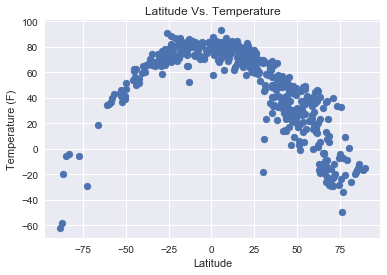

In [38]:
plt.scatter(new_data["Latitudes"],new_data["Temperature(F)"],marker ="o")
plt.title("Latitude Vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
seaborn.set()
plt.show()

# Latitude VS Humidity(%) Plot

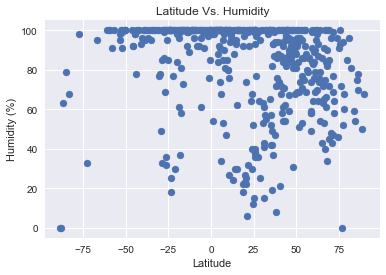

In [39]:
plt.scatter(new_data["Latitudes"],new_data["Humidity(%)"],marker ="o")
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
seaborn.set()
plt.show()

# Latitude VS Cloudiness Plot

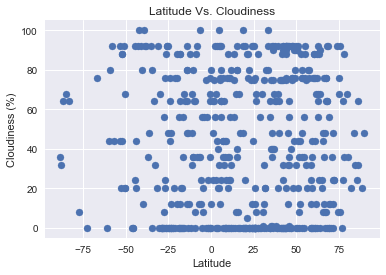

In [40]:
plt.scatter(new_data["Latitudes"],new_data["Cloudiness(%)"],marker ="o")
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
seaborn.set()
plt.show()

# Latitude VS. Wind Speed Plot

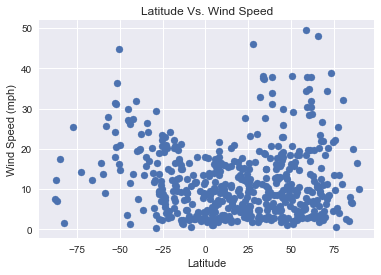

In [41]:
plt.scatter(new_data["Latitudes"],new_data["Windspeed(mph)"],marker ="o")
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
seaborn.set()
plt.show()